# Overview

This notebook contains my attempt at exploring this dataset. It is my first time working with time series data so I explain my insights and learnings from the Discussions and other notebooks published where necessary. Further notebooks will delve into making predictions as well.

## Importing necessary modules -->

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np
from tabulate import tabulate
from rich.console import Console
from rich.table import Table

In [2]:
# test = pd.read_csv("/kaggle/input/playground-series-s5e1/test.csv")
train = pd.read_csv("/kaggle/input/playground-series-s5e1/train.csv")
# sample = pd.read_csv("/kaggle/input/playground-series-s5e1/sample_submission.csv")

In [3]:
display(train.head(10))

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0
5,5,2010-01-01,Canada,Stickers for Less,Holographic Goose,300.0
6,6,2010-01-01,Canada,Stickers for Less,Kaggle,1837.0
7,7,2010-01-01,Canada,Stickers for Less,Kaggle Tiers,1659.0
8,8,2010-01-01,Canada,Stickers for Less,Kerneler,807.0
9,9,2010-01-01,Canada,Stickers for Less,Kerneler Dark Mode,940.0


## Converting the 'date' column to *datetime* -->

In [4]:
def to_date(df):
    df['date'] = pd.to_datetime(df['date'])
    df['month'] = df['date'].dt.to_period('M')
    df['dayofweek'] = df['date'].dt.day_name()

to_date(train)

# Set up the plotting style
plt.style.use('fivethirtyeight')
colors = ['#1F77B4', '#AEC7E8', '#FF7F0E', '#FFBB78', '#2CA02C', '#98DF8A']

## Sales by Month

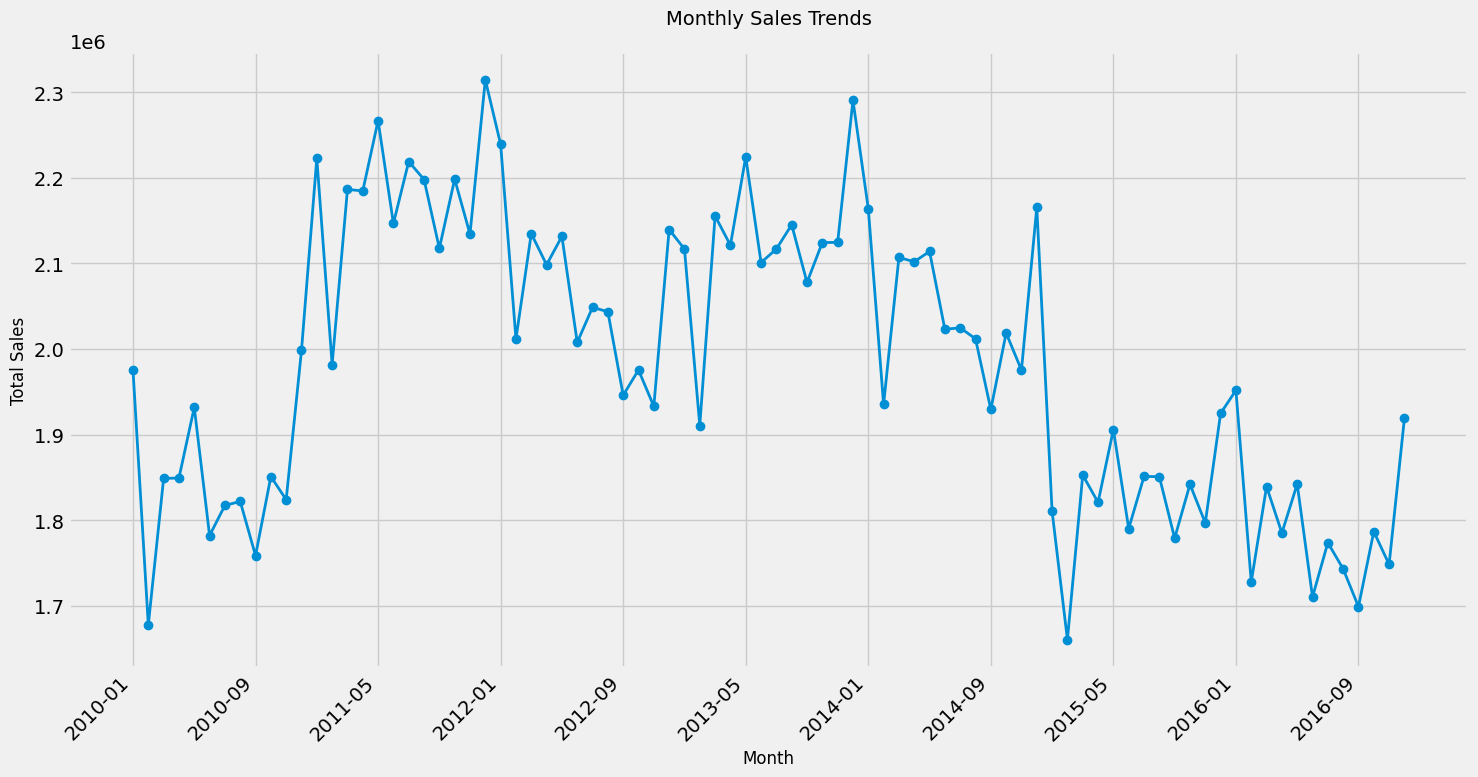

In [5]:
def monthly_sales(df):
    plt.figure(figsize=(15, 8))
    monthly_sales = df.groupby('month')['num_sold'].sum().reset_index()
    monthly_sales['month'] = monthly_sales['month'].astype(str)
    plt.plot(monthly_sales['month'], monthly_sales['num_sold'], marker='o', linewidth=2)
    plt.title('Monthly Sales Trends', fontsize=14, pad=20)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Total Sales', fontsize=12)
    n = len(monthly_sales) // 10
    plt.xticks(range(0, len(monthly_sales), n), monthly_sales['month'][::n], rotation=45, ha='right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

monthly_sales(train)

## Sales by Product -->

It is clear that each plot/product follows a sinusoidal pattern.

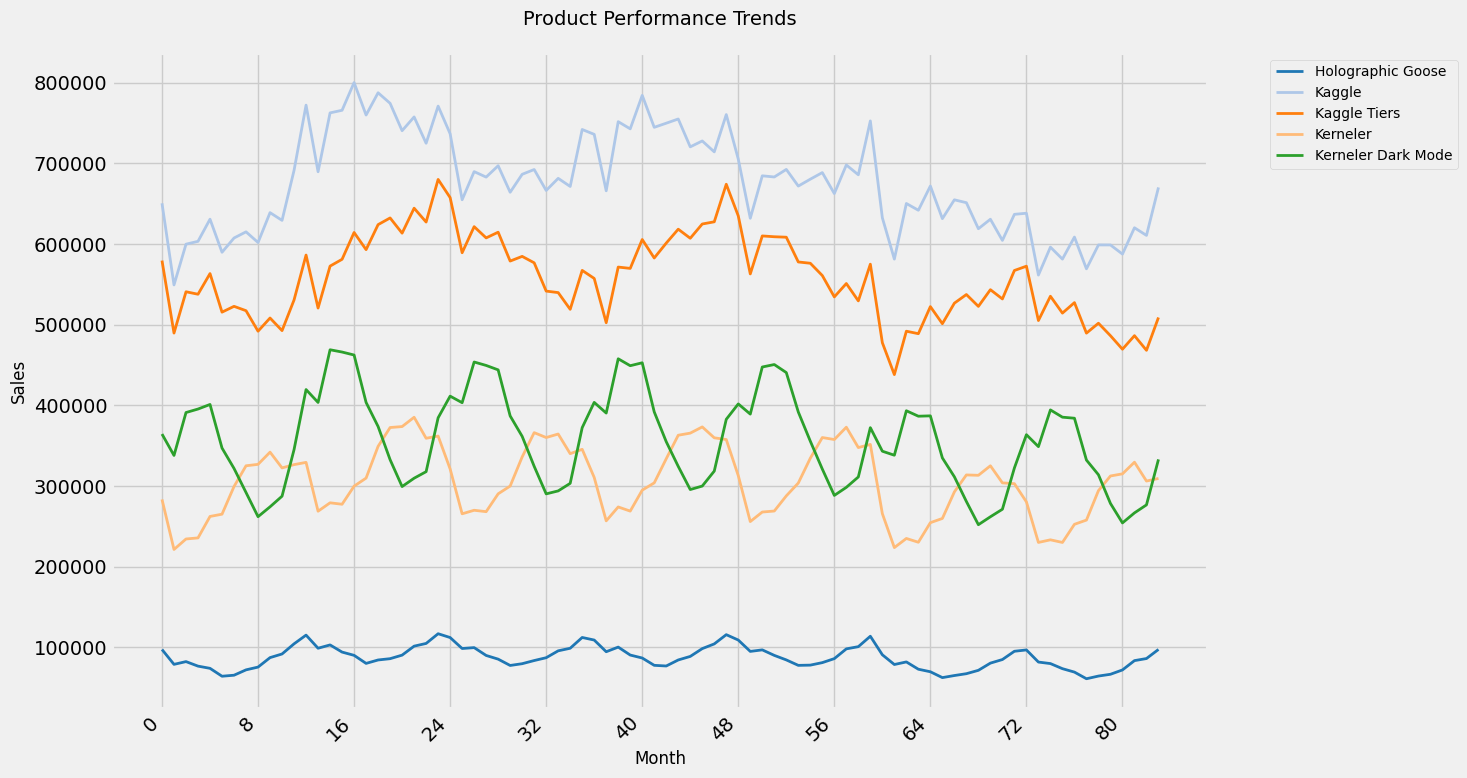

In [6]:
def product_trends(df):
    plt.figure(figsize=(15, 8))
    product_trends = df.pivot_table(
        values='num_sold',
        index='month',
        columns='product',
        aggfunc='sum'
    ).reset_index()
    product_trends.index = product_trends.index.astype(str)
    
    for i, product in enumerate(df['product'].unique()):
        plt.plot(product_trends.index, product_trends[product], 
                 label=product, color=colors[i % len(colors)], linewidth=2)
    plt.title('Product Performance Trends', fontsize=14, pad=20)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Sales', fontsize=12)
    n = len(product_trends) // 10
    plt.xticks(range(0, len(product_trends), n), product_trends.index[::n], rotation=45, ha='right')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

product_trends(train)

## Sales of each store and products at that store -->

<Figure size 1200x600 with 0 Axes>

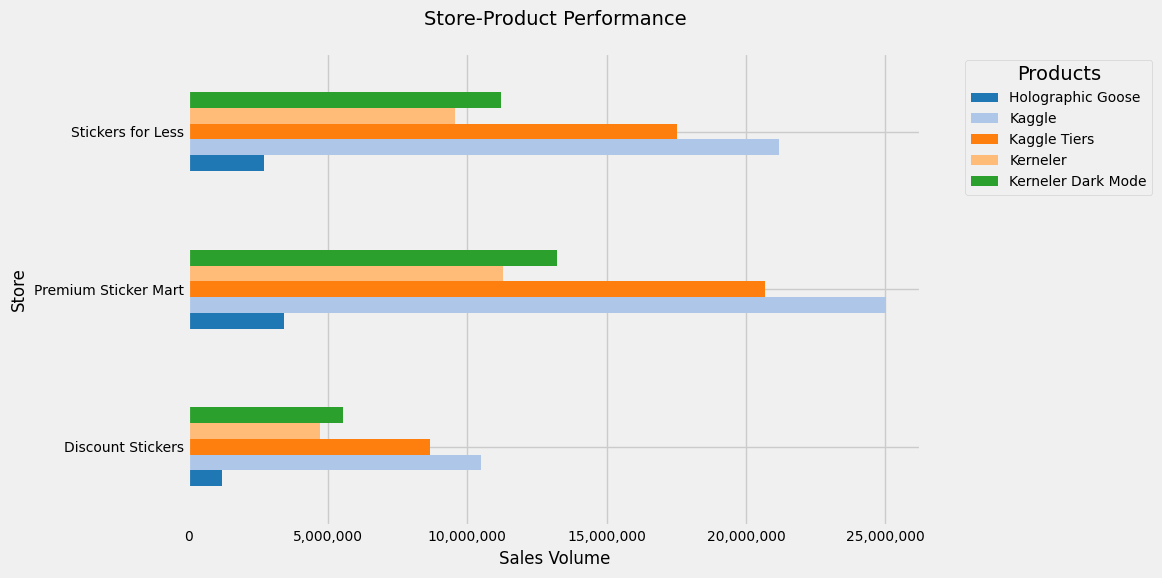

In [7]:
def sales_by_store_and_prod(df):
    plt.figure(figsize=(12, 6))
    store_product = df.pivot_table(
        values='num_sold',
        index='store',
        columns='product',
        aggfunc='sum'
    )
    ax = store_product.plot(kind='barh', stacked=False, color=colors, figsize=(12, 6))
    plt.title('Store-Product Performance', fontsize=14, pad=20)
    plt.xlabel('Sales Volume', fontsize=12)
    plt.ylabel('Store', fontsize=12)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title='Products')
    
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    
    plt.tight_layout()
    plt.show()

sales_by_store_and_prod(train)

## Sales by store -->

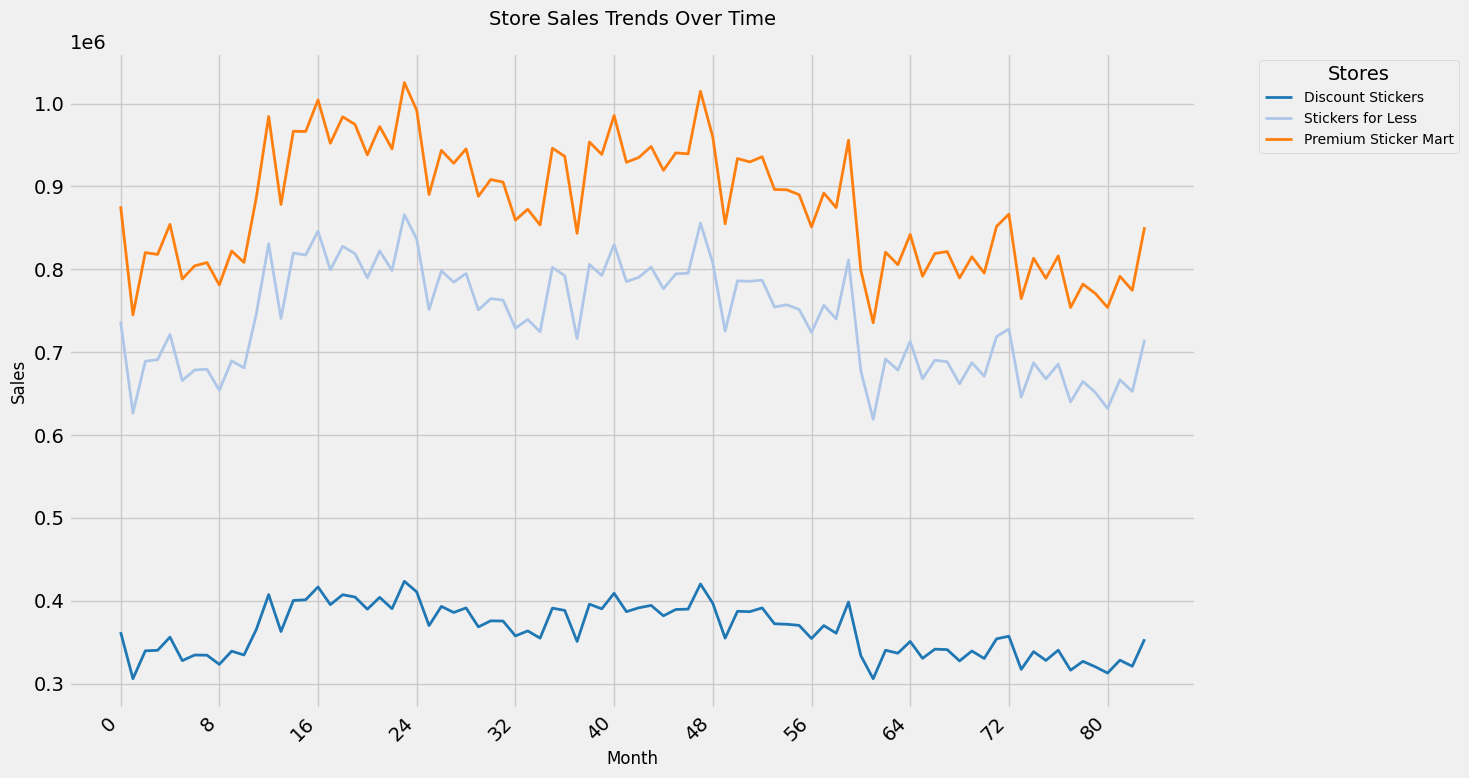

In [8]:
def sales_by_store(df):
    plt.figure(figsize=(15, 8))
    store_monthly = df.pivot_table(
        values='num_sold',
        index='month',
        columns='store',
        aggfunc='sum'
    ).reset_index()
    
    store_monthly.index = store_monthly.index.astype(str)
    
    for i, store in enumerate(df['store'].unique()):
        plt.plot(
            store_monthly.index,
            store_monthly[store],
            label=store,
            color=colors[i % len(colors)],
            linewidth=2
        )
    
    plt.title('Store Sales Trends Over Time', fontsize=14, pad=20)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Sales', fontsize=12)
    
    n = len(store_monthly) // 10
    plt.xticks(range(0, len(store_monthly), n), store_monthly.index[::n], rotation=45, ha='right')
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title='Stores')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

sales_by_store(train)

## Sales by Country --->

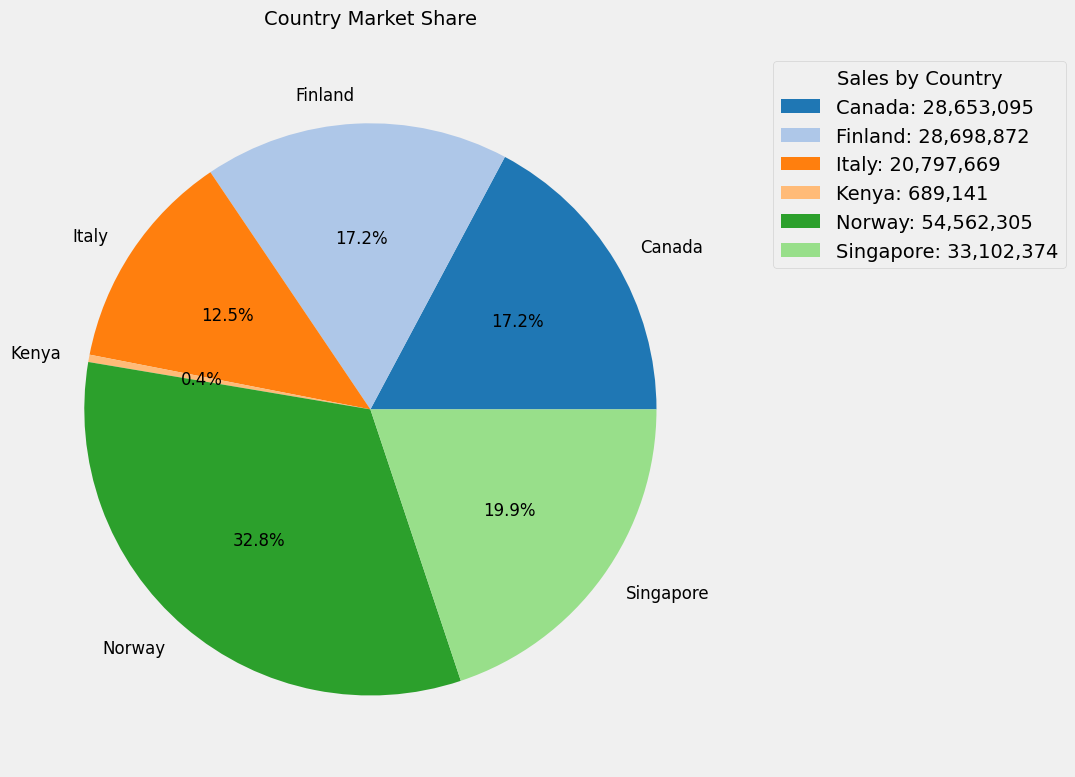

In [9]:
def sales_by_country(df):
    plt.figure(figsize=(12, 8))
    country_sales = df.groupby('country')['num_sold'].sum()
    plt.pie(country_sales, labels=country_sales.index, autopct='%1.1f%%', 
            colors=colors[:len(country_sales)], textprops={'fontsize': 12})
    plt.title('Country Market Share', fontsize=14, pad=20)
    plt.legend(labels=[f'{country}: {value:,.0f}' for country, value in country_sales.items()],
              title="Sales by Country",
              bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

sales_by_country(train)

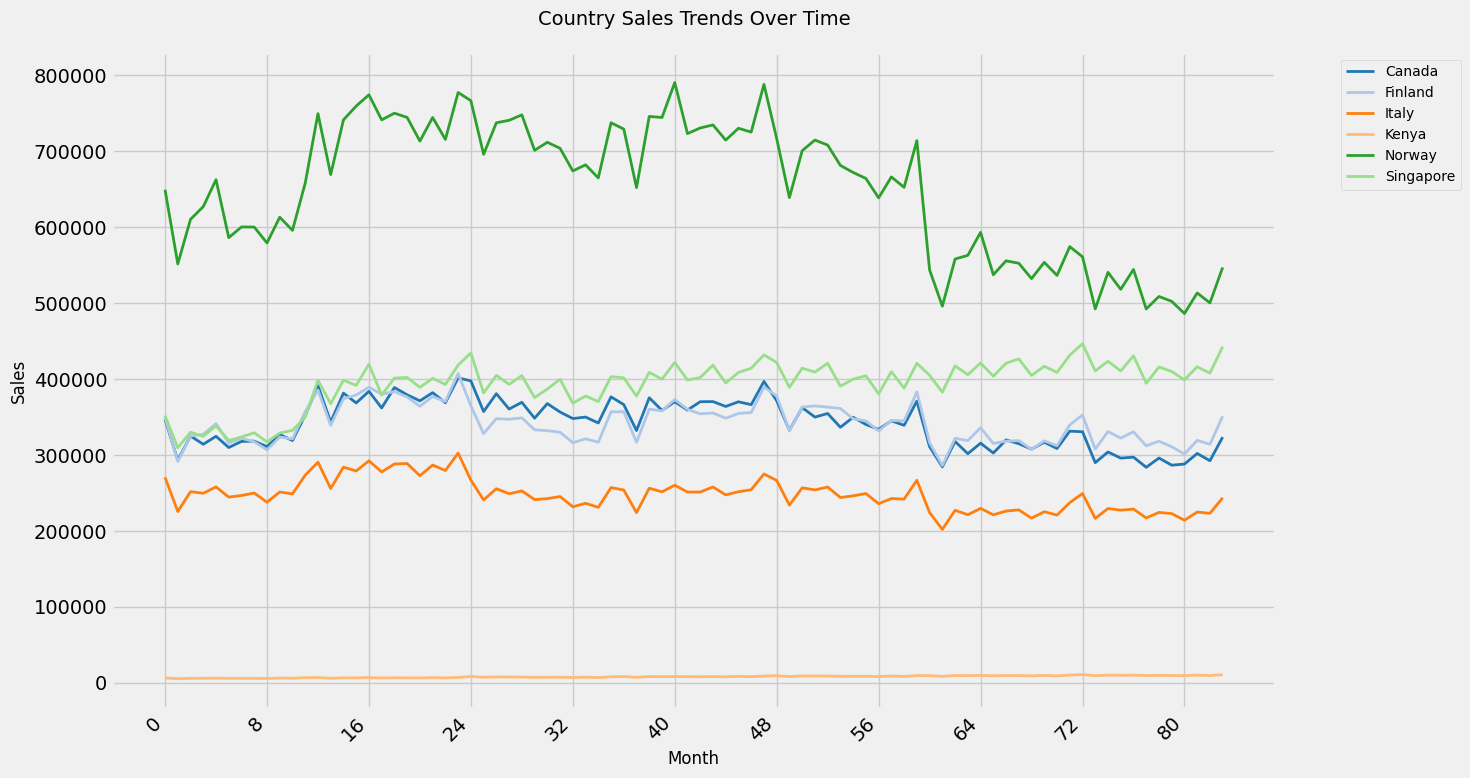

In [10]:
def sales_by_country_over_time(df):
    plt.figure(figsize=(15, 8))
    country_monthly = df.pivot_table(
        values='num_sold',
        index='month',
        columns='country',
        aggfunc='sum'
    ).reset_index()
    country_monthly.index = country_monthly.index.astype(str)
    
    for i, country in enumerate(df['country'].unique()):
        plt.plot(country_monthly.index, country_monthly[country], 
                 label=country, color=colors[i % len(colors)], linewidth=2)
    plt.title('Country Sales Trends Over Time', fontsize=14, pad=20)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Sales', fontsize=12)
    n = len(country_monthly) // 10
    plt.xticks(range(0, len(country_monthly), n), country_monthly.index[::n], rotation=45, ha='right')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

sales_by_country_over_time(train)

## Some statistics -->

In [11]:
console = Console()

def print_statistics(df):
    console.rule("[bold blue] Key Statistics")
    
    console.print("\n[bold cyan]1. Overall Sales Statistics:[/bold cyan]")
    overall_stats = df['num_sold'].describe().apply(lambda x: format(x, ',.2f')).to_dict()
    overall_table = Table(show_header=True, header_style="bold magenta")
    overall_table.add_column("Metric", justify="left")
    overall_table.add_column("Value", justify="right")
    for key, value in overall_stats.items():
        overall_table.add_row(key, value)
    console.print(overall_table)

    console.print("\n[bold cyan]2. Country-wise Sales Statistics:[/bold cyan]")
    country_stats = df.groupby('country')['num_sold'].agg(['mean', 'std', 'min', 'max']).applymap(lambda x: format(x, ',.2f'))
    console.print(tabulate(country_stats, headers="keys", tablefmt="grid"))

    console.print("\n[bold cyan]3. Product Performance Statistics:[/bold cyan]")
    product_stats = df.groupby('product')['num_sold'].agg(['mean', 'std', 'min', 'max']).applymap(lambda x: format(x, ',.2f'))
    console.print(tabulate(product_stats, headers="keys", tablefmt="fancy_grid"))

    console.print("\n[bold cyan]4. Store Performance Statistics:[/bold cyan]")
    store_stats = df.groupby('store')['num_sold'].agg(['mean', 'std', 'min', 'max']).applymap(lambda x: format(x, ',.2f'))
    console.print(tabulate(store_stats, headers="keys", tablefmt="pipe"))

    pivot_data = df.pivot_table(
        values='num_sold',
        index='date',
        columns='product',
        aggfunc='sum'
    )
    console.print("\n[bold cyan]5. Product Sales Correlation Matrix:[/bold cyan]")
    correlation_matrix = pivot_data.corr().round(3)
    console.print(tabulate(correlation_matrix, headers="keys", tablefmt="rounded_outline"))

# Call the function
print_statistics(train)

─────────────────────────────────────────────────  Key Statistics ─────────────────────────────────────────────────

1. Overall Sales Statistics:

┏━━━━━━━━┳━━━━━━━━━━━━┓
┃ Metric ┃      Value ┃
┡━━━━━━━━╇━━━━━━━━━━━━┩
│ count  │ 221,259.00 │
│ mean   │     752.53 │
│ std    │     690.17 │
│ min    │       5.00 │
│ 25%    │     219.00 │
│ 50%    │     605.00 │
│ 75%    │   1,114.00 │
│ max    │   5,939.00 │
└────────┴────────────┘

2. Country-wise Sales Statistics:

<ipython-input-11-d3dbbe1ea434>:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  country_stats = df.groupby('country')['num_sold'].agg(['mean', 'std', 'min', 'max']).applymap(lambda x: format(x, ',.2f'))


+-----------+----------+--------+-------+----------+
| country   | mean     |    std |   min | max      |
+===========+==========+========+=======+==========+
| Canada    | 840.05   | 469.99 |   200 | 2,749.00 |
+-----------+----------+--------+-------+----------+
| Finland   | 748.24   | 486.42 |    65 | 3,173.00 |
+-----------+----------+--------+-------+----------+
| Italy     | 542.24   | 353.22 |    44 | 1,907.00 |
+-----------+----------+--------+-------+----------+
| Kenya     | 20.43    |  11.93 |     5 | 73.00    |
+-----------+----------+--------+-------+----------+
| Norway    | 1,422.56 | 944.34 |   105 | 5,939.00 |
+-----------+----------+--------+-------+----------+
| Singapore | 863.05   | 560.88 |    69 | 2,907.00 |
+-----------+----------+--------+-------+----------+

3. Product Performance Statistics:

<ipython-input-11-d3dbbe1ea434>:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  product_stats = df.groupby('product')['num_sold'].agg(['mean', 'std', 'min', 'max']).applymap(lambda x: format(x, ',.2f'))


╒════════════════════╤══════════╤════════╤═══════╤══════════╕
│ product            │ mean     │    std │   min │ max      │
╞════════════════════╪══════════╪════════╪═══════╪══════════╡
│ Holographic Goose  │ 197.48   │ 120.25 │     5 │ 908.00   │
├────────────────────┼──────────┼────────┼───────┼──────────┤
│ Kaggle             │ 1,232.38 │ 875.54 │    10 │ 5,939.00 │
├────────────────────┼──────────┼────────┼───────┼──────────┤
│ Kaggle Tiers       │ 1,018.34 │ 724.04 │     8 │ 4,958.00 │
├────────────────────┼──────────┼────────┼───────┼──────────┤
│ Kerneler           │ 556.91   │ 401.21 │     5 │ 2,496.00 │
├────────────────────┼──────────┼────────┼───────┼──────────┤
│ Kerneler Dark Mode │ 651.04   │ 477.55 │     5 │ 3,127.00 │
╘════════════════════╧══════════╧════════╧═══════╧══════════╛

4. Store Performance Statistics:

<ipython-input-11-d3dbbe1ea434>:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  store_stats = df.groupby('store')['num_sold'].agg(['mean', 'std', 'min', 'max']).applymap(lambda x: format(x, ',.2f'))


| store                |   mean |    std |   min | max      |
|:---------------------|-------:|-------:|------:|:---------|
| Discount Stickers    | 427.78 | 339.68 |     5 | 2,488.00 |
| Premium Sticker Mart | 973.84 | 814.58 |     5 | 5,939.00 |
| Stickers for Less    | 840.05 | 688.52 |     5 | 4,444.00 |

5. Product Sales Correlation Matrix:

╭────────────────────┬─────────────────────┬──────────┬────────────────┬────────────┬──────────────────────╮
│ product            │   Holographic Goose │   Kaggle │   Kaggle Tiers │   Kerneler │   Kerneler Dark Mode │
├────────────────────┼─────────────────────┼──────────┼────────────────┼────────────┼──────────────────────┤
│ Holographic Goose  │               1     │    0.738 │          0.701 │      0.526 │                0.474 │
│ Kaggle             │               0.738 │    1     │          0.861 │      0.645 │                0.594 │
│ Kaggle Tiers       │               0.701 │    0.861 │          1     │      0.585 │                0.601 │
│ Kerneler           │               0.526 │    0.645 │          0.585 │      1     │               -0.145 │
│ Kerneler Dark Mode │               0.474 │    0.594 │          0.601 │     -0.145 │                1     │
╰────────────────────┴─────────────────────┴──────────┴────────────────┴────────────┴──────────────────────╯